## PCA

In [17]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [18]:
#import clean data set
df = pd.read_csv('medical_data_clean.csv', index_col = 0)

In [19]:
df = df[['Population', 'Children', 'Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

In [20]:
df.head()

,Population,Children,Age,Income,Doc_visits,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,2951,1.0,53.0,86575.93,6,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,11303,3.0,51.0,46805.99,4,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,17125,3.0,53.0,14370.14,4,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,2162,0.0,78.0,39741.49,4,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5287,1.0,22.0,1209.56,5,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [21]:
#normalize the data
df_normalized = (df - df.mean()) / df.std()

In [22]:
pca = PCA(n_components = df.shape[1])

In [23]:
pca.fit(df_normalized)
df_pca = pd.DataFrame(pca.transform(df_normalized),
                      columns = ['Population', 'Children', 'Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

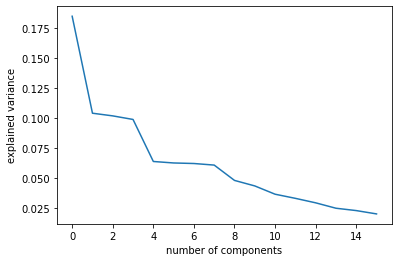

In [24]:
#create scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
#plt.savefig('PCA Scree Plot.jpg')
plt.show()

In [25]:
#get eigenvalues
cov_matrix = np.dot(df_normalized.T, df_normalized) / df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

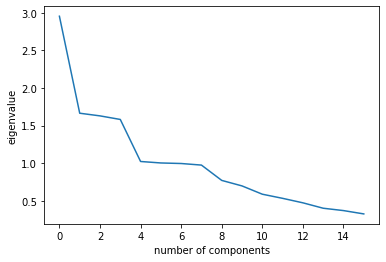

In [26]:
#plot eigenvalues as screen plot
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
#plt.savefig('Eigenvalue Plot.jpg')
plt.show()

In [27]:
#generate loading values
loadings = pd.DataFrame(pca.components_.T,
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
                        index = df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
Population,0.010278,-0.009401,0.010817,0.053673,0.465788,0.248444,0.717545,0.448613,0.009316,-0.022869,-0.005660,-0.022267,-0.026500,0.003043,0.011542,-0.004232
Children,0.002472,-0.005399,0.023222,0.007027,0.205665,0.879096,-0.209708,-0.369631,0.053126,-0.004109,0.014986,-0.015151,-0.015042,0.003258,0.011382,-0.001897
Age,0.000722,0.274729,0.542313,-0.359966,-0.007750,-0.005858,0.007681,0.017772,-0.001514,-0.024787,-0.006954,0.029560,-0.048358,-0.321546,0.625988,-0.035284
Income,-0.002451,0.006474,-0.019637,-0.011210,0.569650,-0.076531,-0.649589,0.493759,-0.054034,0.015546,-0.006128,0.007291,-0.003588,-0.003034,0.006109,-0.002570
Doc_visits,0.007143,0.003616,0.000507,-0.020086,0.643366,-0.391355,0.121495,-0.644886,-0.015129,-0.027359,-0.025041,0.007999,-0.009842,-0.006477,0.001548,-0.002219
Initial_days,-0.019220,0.305166,0.225529,0.596081,-0.002418,-0.010820,-0.022697,-0.011384,-0.013470,-0.009500,-0.000108,-0.011916,0.050205,-0.629323,-0.309244,-0.070340
TotalCharge,-0.014515,0.327069,0.236955,0.578561,-0.006118,-0.027486,-0.027960,-0.015461,0.002384,-0.008786,0.002080,0.018884,-0.048144,0.631925,0.307363,0.059646
Additional_charges,0.004292,0.282148,0.536721,-0.363039,0.013715,0.004781,0.010471,0.019293,0.006274,0.009804,0.016141,-0.025644,0.044430,0.297919,-0.637954,0.032351
Item1,0.454840,-0.237705,0.164447,0.065448,-0.007437,-0.000324,-0.008473,-0.001120,-0.096274,-0.074885,-0.010298,0.083333,0.183661,0.093503,0.008861,-0.800426
Item2,0.428551,-0.230403,0.167090,0.071008,0.005925,0.013443,-0.000334,0.000721,-0.146993,-0.133234,-0.061149,0.092574,0.625122,-0.028715,0.049799,0.533227
